In [3]:
from datagen import SemCorDataSet
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd


In [5]:

# all = SemCorDataSet.unpickle('dataset/train.pkl')
semcor = SemCorDataSet.unpickle('dataset/semcor4roberta.pickle')
#omsti = SemCorDataSet(all.df[semcor.df.shape[0]:])

## Train Dateset Analysis

In [6]:
def print_alinged(key, value):
    print(f"{key: <35} = {value:>20,}")

In [7]:
def num_tokens(dataset):
    return dataset.token_level.shape[0]

#print_alinged("Total token count", num_tokens(all))
print_alinged("- SemCor token count", num_tokens(semcor))
#print_alinged("- OMSTI token count", num_tokens(omsti))

- SemCor token count                =              802,443


In [9]:
def num_sense_tokens(dataset):
    df = dataset.token_level
    sense_tokesn = df[df["sense-keys"].notnull()]
    return sense_tokesn.shape[0]

#print_alinged("Total tokens with sense count", num_sense_tokens(all))
print_alinged("- SemCor tokens with sense count", num_sense_tokens(semcor))
#print_alinged("- OMSTI tokens with sense count", num_sense_tokens(omsti))

- SemCor tokens with sense count    =              121,220


In [10]:
def num_sentences(dataset):
    return len(dataset.sentences().groups)

#print_alinged("Total sentence count", num_sentences(all))
print_alinged("- SemCor sentence count", num_sentences(semcor))
#print_alinged("- OMSTI sentence count", num_sentences(omsti))

- SemCor sentence count             =               37,176


### Per-Sentence statistics

In [11]:
def sentences_token_stat(dataset):
    sentence_counts = dataset.sentences().count()
    print(sentence_counts[['token', 'sense-keys']].describe())
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 7.5))
    sentence_counts.hist(column=["token"], ax=axes[0], sharey=True, bins=50, legend=True, range=(0, 100))
    axes[0].set_title("Tokens per sentence")
    sentence_counts.hist(column=["sense-keys"], ax=axes[1], sharey=True, bins=50, legend=True, range=(0, 100), color="orange")
    axes[1].set_title("Sense tokens per sentence")
    


#### Both

In [12]:
#sentences_token_stat(all)

AttributeError: 'builtin_function_or_method' object has no attribute 'sentences'

#### SemCor

              token    sense-keys
count  37176.000000  37176.000000
mean      21.584974      3.260706
std       13.685187      3.224933
min        1.000000      0.000000
25%       12.000000      1.000000
50%       19.000000      2.000000
75%       28.000000      5.000000
max      258.000000     60.000000


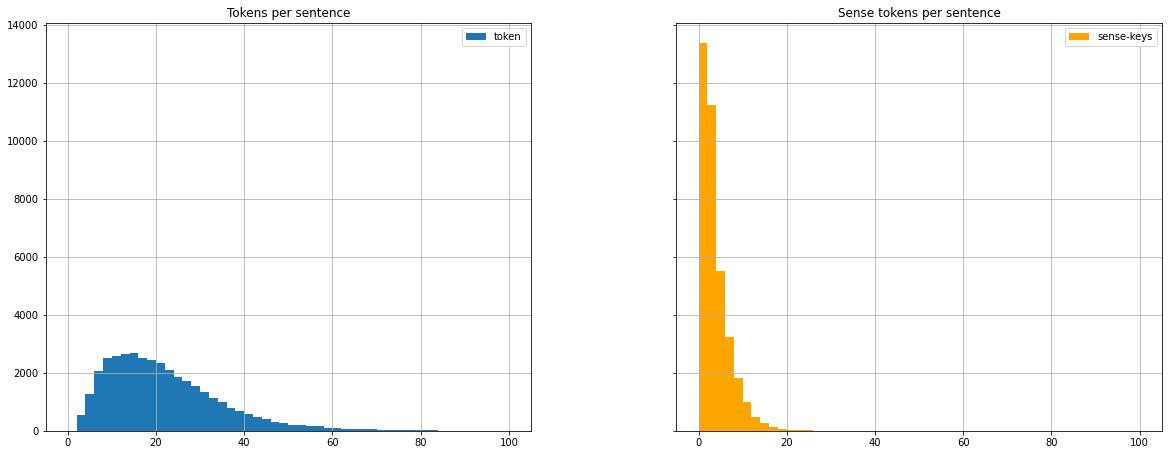

In [13]:
sentences_token_stat(semcor)

#### OMSTI

In [ ]:
#sentences_token_stat(omsti)

### Token analysis


In [14]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/benji/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def token_analysis(dataset):

    stop_words = set(nltk.corpus.stopwords.words('english'))
    lemmas_only = dataset.token_level['lemma']
    lemmas_stop = lemmas_only[lemmas_only.isin(stop_words)].to_frame()
    lemmas_no_stop = lemmas_only[~lemmas_only.isin(stop_words)].to_frame()
    lemmas_with_sense = lemmas_only[dataset.token_level['sense-keys'].notnull()].to_frame()
    
    dataset.token_level[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title='Top 50 tokens')
    lemmas_stop[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title="Top 50 stop tokens")
    lemmas_no_stop[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title="Top 50 non stop tokens")
    lemmas_with_sense[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title="Top 50 tokens with sense", color='orange')


    lemma_groups = dataset.token_level.groupby("lemma")
    lemma_token_counts = lemma_groups.count()
    print(lemma_token_counts[["token"]].describe())

#### Both togehter

In [18]:
#token_analysis(all)

AttributeError: 'builtin_function_or_method' object has no attribute 'token_level'


#### SemCor

              token
count  34968.000000
mean      22.947924
std      499.929942
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max    48752.000000


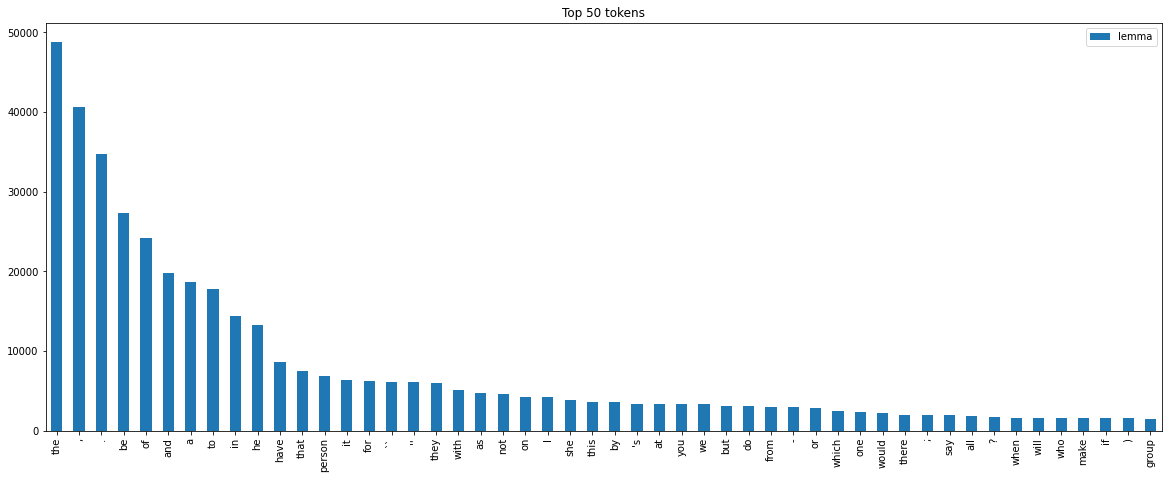

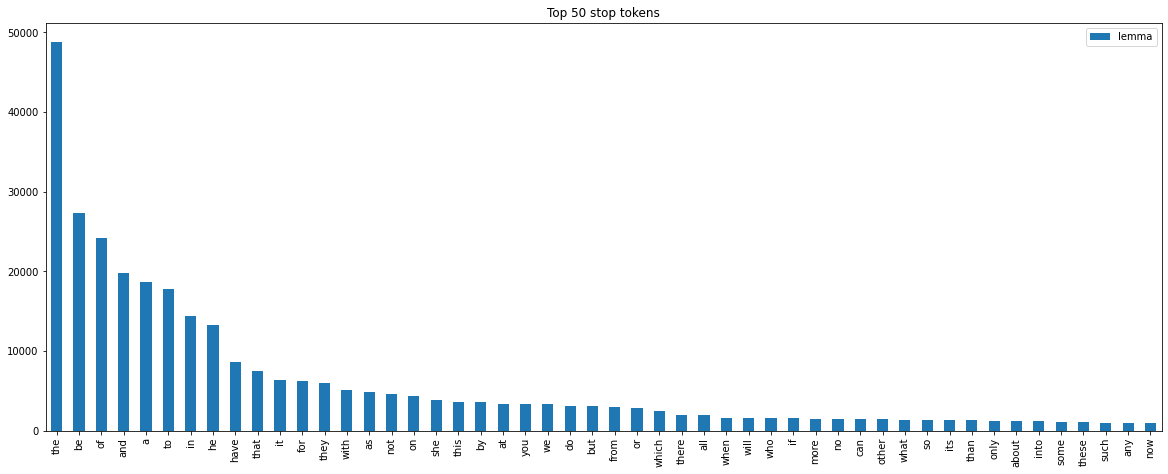

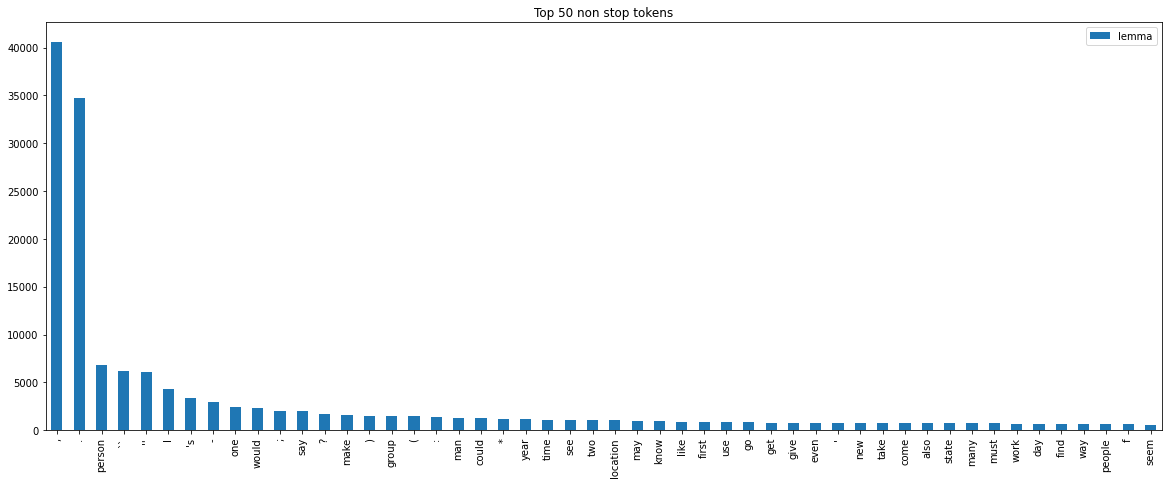

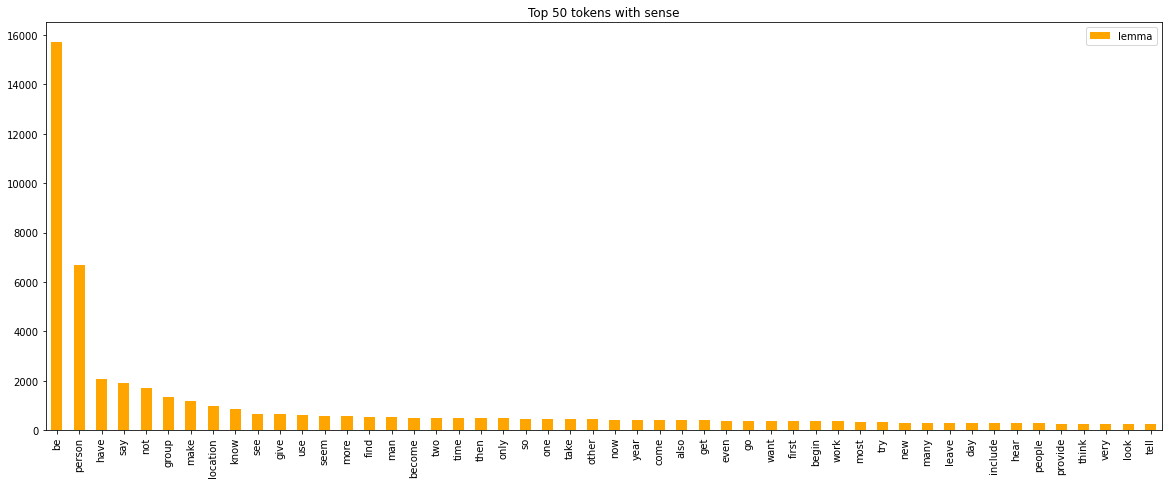

In [19]:
token_analysis(semcor)

#### OMSTI

In [ ]:
token_analysis(omsti)

### Sense Analysis

In [24]:
def sense_analysis(dataset):
    print_alinged('Unique senses', dataset.token_level['sense-keys'].nunique())
    dataset.token_level[['sense-keys']].apply(pd.value_counts).sort_values(ascending=False, by='sense-keys').head(50).plot(kind="bar", figsize=(20, 7.5), title='Top 50 senses', color='orange')

#### Both

In [ ]:
sense_analysis(all)

#### SemCor

Unique senses                       =                2,584


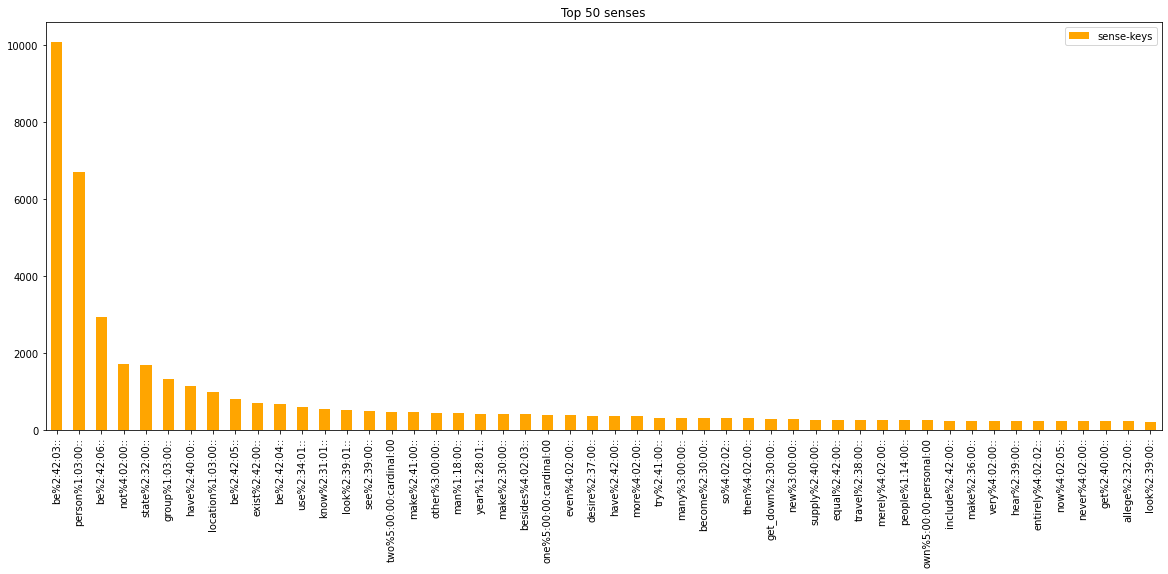

In [25]:
sense_analysis(semcor)

#### OMSTI

In [ ]:
sense_analysis(omsti)

### Sense/POS Analysis

In [28]:
import nltk.tag as tag
nltk.download('averaged_perceptron_tagger')

def sense_pos_analysis(dataset):
    sentences = dataset.sentences()

    all = dataset.token_level.copy()
    all['pos'] = ""

    for key, _ in sentences:
        sentence_frame = sentences.get_group(key)
        tagged_tokens = tag.pos_tag(sentence_frame['token'])
        for token_num, row_df in enumerate(sentence_frame.index.to_list()):
            _, pos = tagged_tokens[token_num]
            all.at[row_df, 'pos'] = pos
    
    with_sense = all[dataset.token_level['sense-keys'].notnull()]
    with_sense[['pos']].apply(pd.value_counts).sort_values(ascending=False, by='pos').plot(kind="bar", figsize=(20, 7.5), title='Sense tokens per POS', color='orange')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/benji/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Both

In [ ]:
sense_pos_analysis(all)

#### SemCor

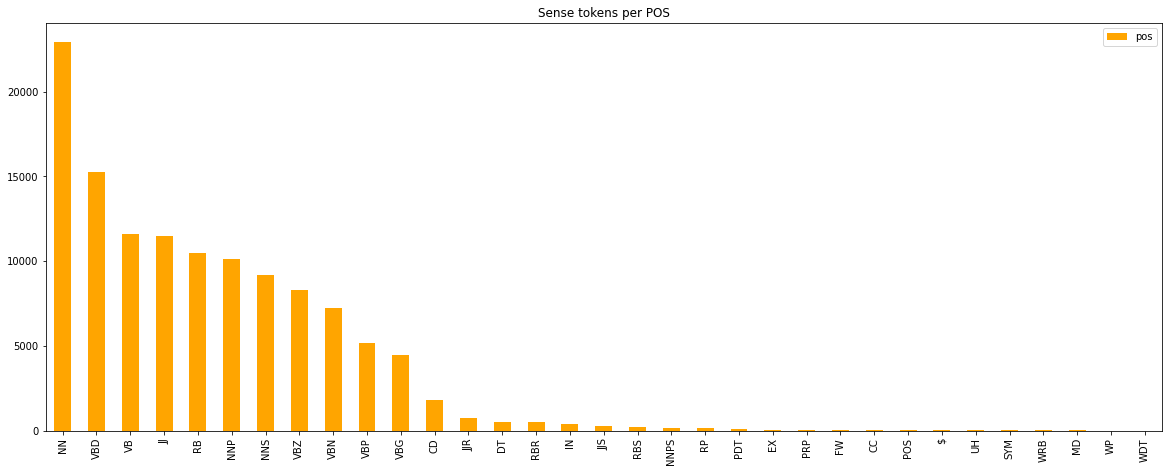

In [29]:
sense_pos_analysis(semcor)

#### OMSTI

In [ ]:
sense_pos_analysis(omsti)

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
what = wn.all_eng_synsets()

print(what)

sense_keys = []
for synset in list(what):
    for lemma in synset.lemmas():
        sense_keys.append(lemma.key())

In [ ]:
len(sense_keys)

In [ ]:
sense_key_df = pd.DataFrame(list(dict.fromkeys(sense_keys)), columns=["sense_key"])

In [ ]:
sense_key_df["sense_key_idx"] = pd.factorize(sense_key_df["sense_key"])[0]

In [ ]:
sense_key_df

In [ ]:
ds = SemCorDataSet.unpickle('./dataset/train_semcor_roberta.pickle')

In [ ]:
ds.token_level["sense-key-idx1"].unique().shape


{'senseval2-bert-wwm+probing_0': {'eval_loss': nan,
  'eval_accuracy': 0.14606741573033707,
  'eval_precision': 0.18309499489274772,
  'eval_recall': 0.14606741573033707,
  'eval_word_sense_similarity': 0.1980630318939534,
  'eval_f1': 0.15035750766087846,
  'eval_runtime': 2.7862,
  'eval_samples_per_second': 86.857,
  'eval_steps_per_second': 11.126},
 'senseval2-deberta+probing_0': {'eval_loss': nan,
  'eval_accuracy': 0.1797752808988764,
  'eval_precision': 0.23314606741573032,
  'eval_recall': 0.1797752808988764,
  'eval_word_sense_similarity': 0.18001050915376757,
  'eval_f1': 0.1897003745318352,
  'eval_runtime': 1.8983,
  'eval_samples_per_second': 127.481,
  'eval_steps_per_second': 16.33},
 'senseval2-roberta+probing_0': {'eval_loss': nan,
  'eval_accuracy': 0.15730337078651685,
  'eval_precision': 0.1853932584269663,
  'eval_recall': 0.15730337078651685,
  'eval_word_sense_similarity': 0.17713107741197628,
  'eval_f1': 0.16235955056179774,
  'eval_runtime': 1.7064,
  'eval_s